#### Build a multiple linear regression model by performing EDA and do necessary transformations and select the best model using Python. Prepare a model for predictions of profit
##### Dataset Name  - 50_startups data.


In [1]:
## Importing all the necessary libraries

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Load the Dataset
data = pd.read_csv("D:/TopMentor_DS_course/batch - 114 ML_Regression_Assignments/Advance Project - 34_Multiple_Reg/Project - 3&4_Multiple_Reg/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
print("Columns in the Datasets: ", data.columns)

Columns in the Datasets:  Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [4]:
print("Shape of the Dataset: ", data.shape)
print()
print("Information of Dataset")
print("====================================================")
data.info()

Shape of the Dataset:  (50, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
print("Null Values in the Datsets: ", data.isnull().sum())

Null Values in the Datsets:  R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [6]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
### Data Preprocessing (One Hot Encoding)
data_encoded = pd.get_dummies(data, columns=['State'], drop_first=True, dtype=int)


In [8]:
data_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [9]:
## Descriptive Analysis 

round(data.describe(),2)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


#### EXPLORATORY DATA ANALYSIS (EDA)

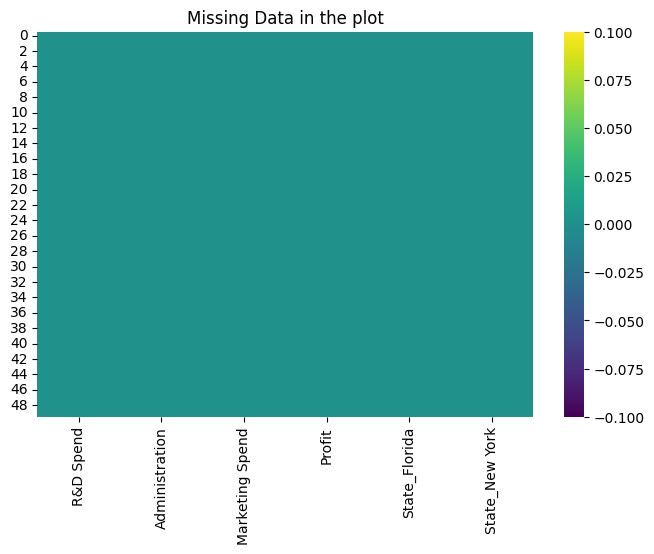

In [10]:
# Missing data in a plot

plt.figure(figsize=(8,5))
plt.title("Missing Data in the plot")
sns.heatmap(data_encoded.isnull(), cmap='viridis')
plt.savefig("D:/TopMentor_DS_course/batch - 114 ML_Regression_Assignments/Advance Project - 34_Multiple_Reg/Project - 3&4_Multiple_Reg/50_Startups_Graphs/Heatmap.png")

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


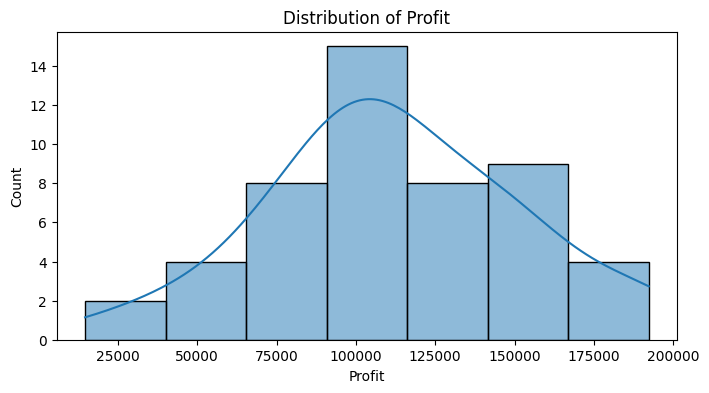

In [11]:
## Distribution of Profit

plt.figure(figsize=(8,4))
sns.histplot(data['Profit'], kde=True)
plt.title("Distribution of Profit")
plt.savefig("D:/TopMentor_DS_course/batch - 114 ML_Regression_Assignments/Advance Project - 34_Multiple_Reg/Project - 3&4_Multiple_Reg/50_Startups_Graphs/Profit_Distr.png")
plt.show()

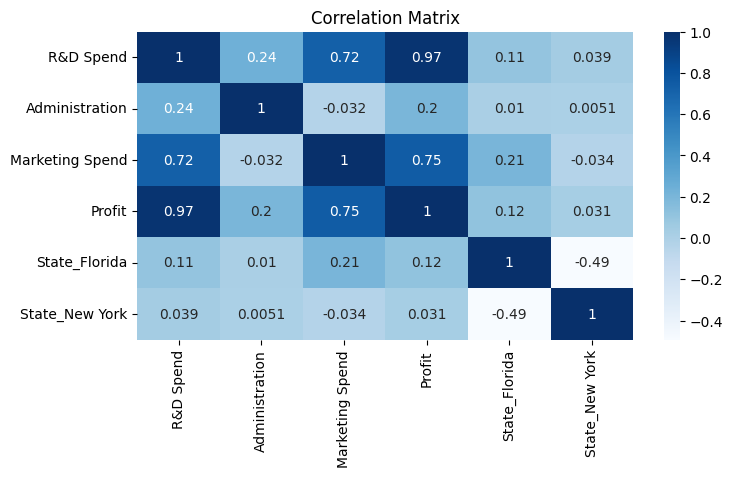

In [12]:
# Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(data_encoded.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.savefig("D:/TopMentor_DS_course/batch - 114 ML_Regression_Assignments/Advance Project - 34_Multiple_Reg/Project - 3&4_Multiple_Reg/50_Startups_Graphs/Corr_Heatmap.png")
plt.show()

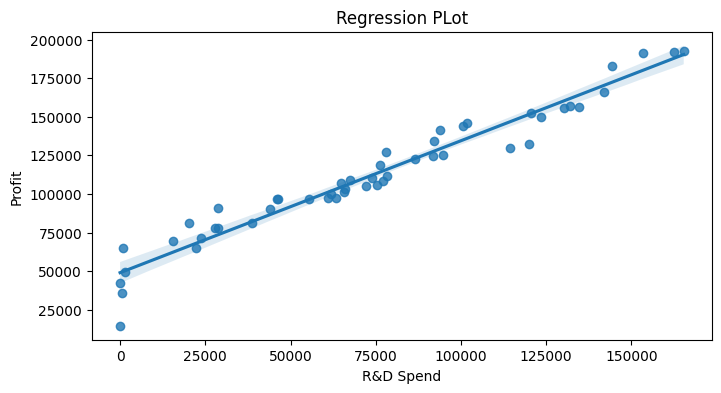

In [21]:
## Regression Plot
plt.figure(figsize=(8,4))
sns.regplot(data = data, x='R&D Spend', y='Profit',)
plt.title("Regression PLot")
plt.savefig("D:/TopMentor_DS_course/batch - 114 ML_Regression_Assignments/Advance Project - 34_Multiple_Reg/Project - 3&4_Multiple_Reg/50_Startups_Graphs/Regplot.png")
plt.show()

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

<Figure size 500x300 with 0 Axes>

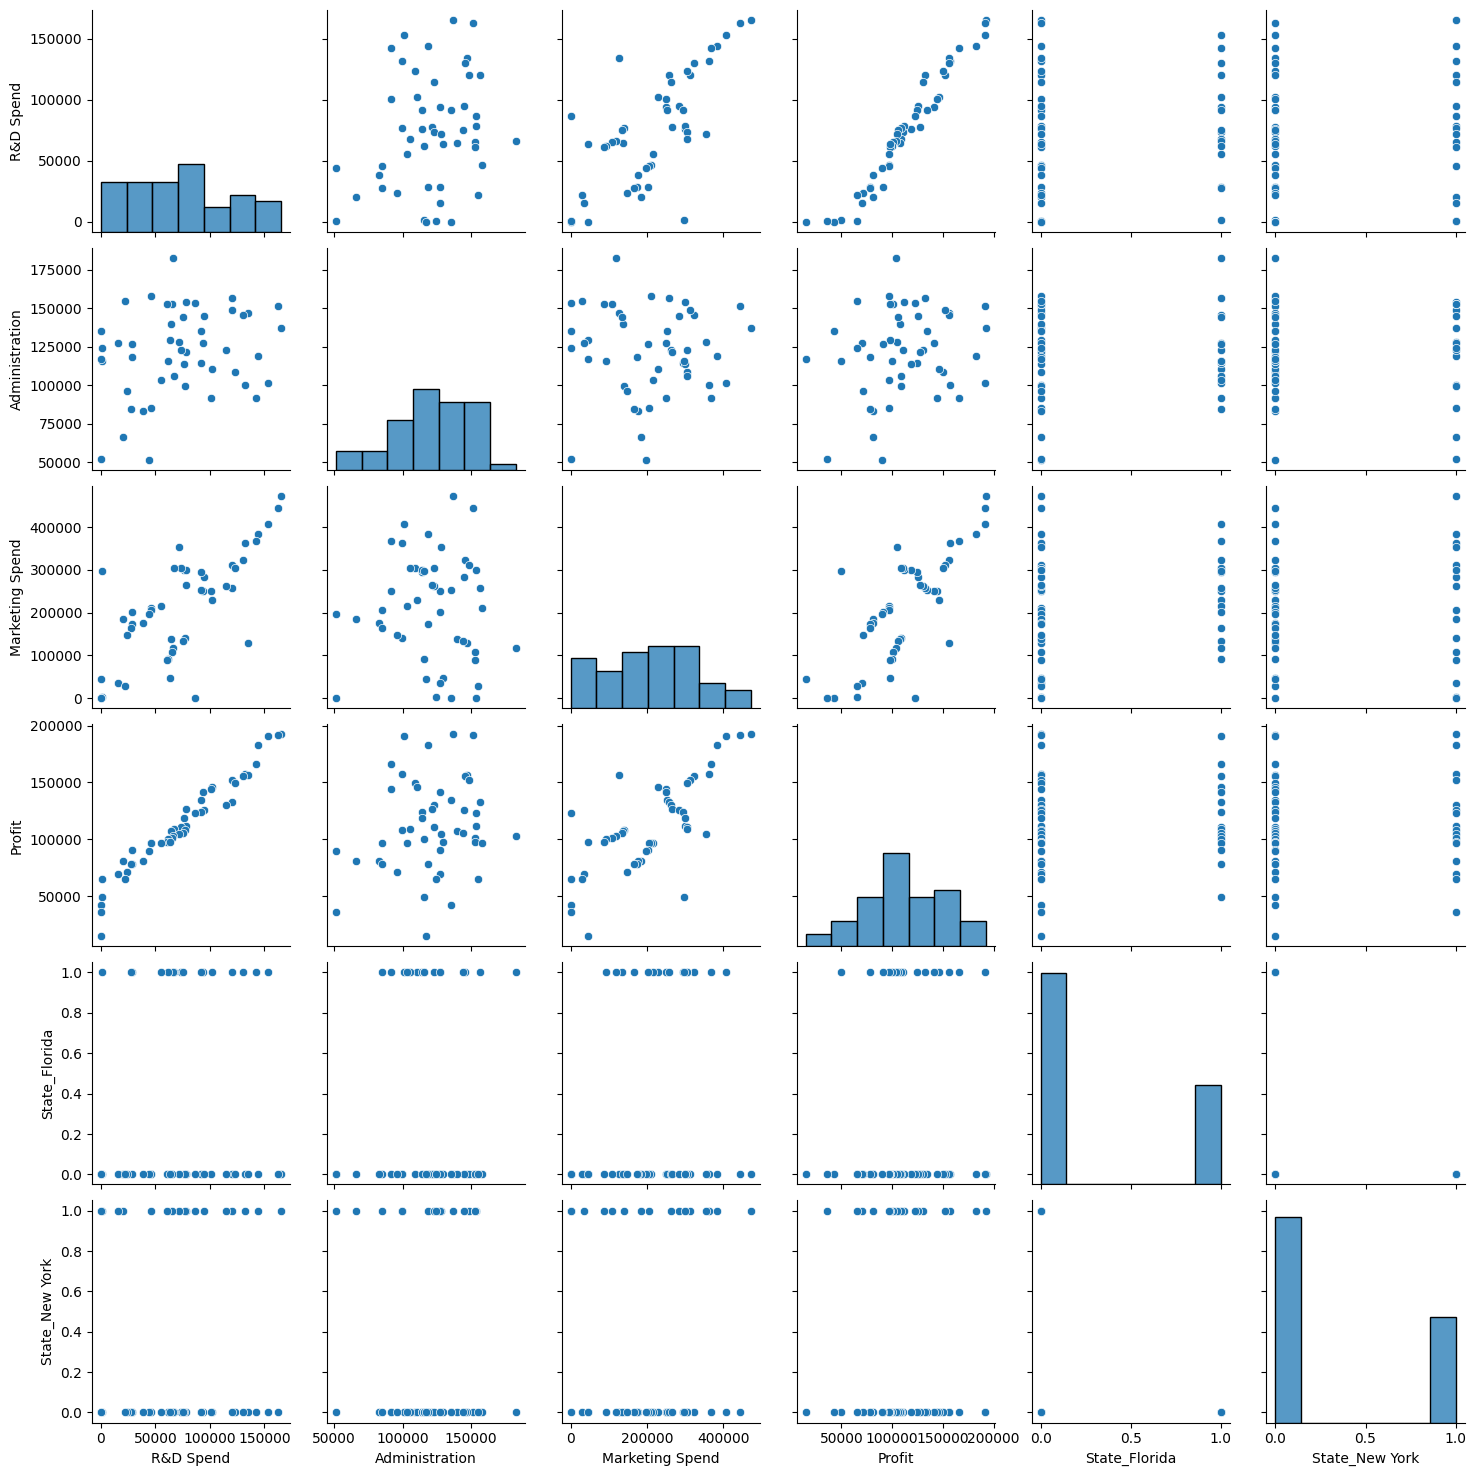

In [13]:
# Pairplot
plt.figure(figsize=(5,3))
sns.pairplot(data_encoded)
plt.savefig("D:/TopMentor_DS_course/batch - 114 ML_Regression_Assignments/Advance Project - 34_Multiple_Reg/Project - 3&4_Multiple_Reg/50_Startups_Graphs/Pairplot.png")
plt.show()

## MODEL BUILDING

In [14]:
## Sampling the data into input and output variables

X = data_encoded.drop('Profit', axis=1)
y = data_encoded['Profit']

In [15]:
# 4. Model Building Functions
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return round(r2, 4)

#### Preparing different models

In [16]:
# Model 1: Base Model
r2_base = evaluate_model(X, y)

# Model 2: Log Transformation
y_log = np.log1p(y)
r2_log = evaluate_model(X, y_log)

# Model 3: Square Root Transformation
y_sqrt = np.sqrt(y)
r2_sqrt = evaluate_model(X, y_sqrt)

In [17]:
# 5. Results Table
results = pd.DataFrame({
    'Model Type': ['Base Linear Regression', 'Log Transformation', 'Sqrt Transformation'],
    'R-Squared Value': [r2_base, r2_log, r2_sqrt]
})

print("\n--- Model Performance Table ---")
results


--- Model Performance Table ---


,Model Type,R-Squared Value
0,Base Linear Regression,0.8987
1,Log Transformation,0.7013
2,Sqrt Transformation,0.8306
